Dataset successfully downloaded!


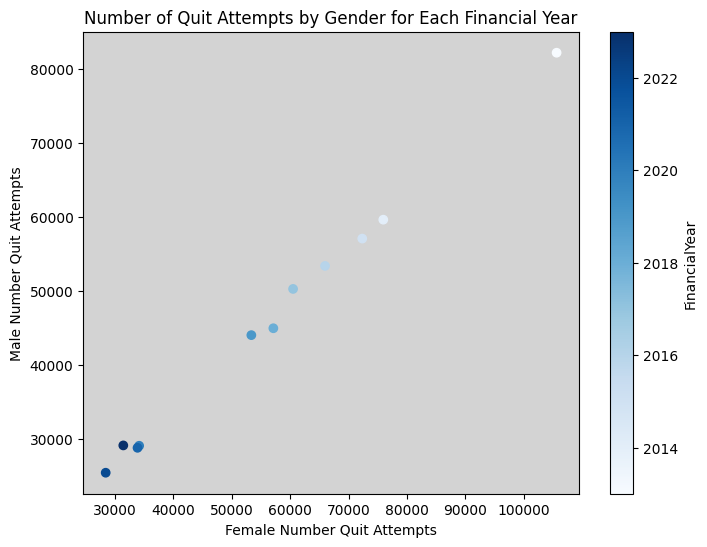

In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Step 1: Direct URL to the CSV file
url = 'https://www.opendata.nhs.scot/dataset/cff63b00-5c99-4efd-9ff7-83c4a1a95fe9/resource/a020dc7b-750d-4170-9472-9901a514912b/download/smoking_cessation_gender_age.csv'  

# Step 2: Send an HTTP request to the URL
response = requests.get(url)

if response.status_code == 200:
    print("Dataset successfully downloaded!")
    # Step 4: Write the content to a file (if it's CSV)
    with open('smoking_cessation_data.csv', 'wb') as file:
        file.write(response.content)
           # Step 5: Load the CSV into a DataFrame
    df = pd.read_csv('smoking_cessation_data.csv')
    
else:
    print(f"Failed to retrieve the dataset. Status code: {response.status_code}")

# List of columns you want to drop
columns_to_drop = ['GenderQF', 'AgeGroupQF', 'NumberFourWeekQuits', 'NumberTwelveWeekQuits', 'FourWeekQuitRate', 'TwelveWeekQuitRate']

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Group by 'FinancialYear' and 'Gender', then sum 'NumberQuitAttempts'
df_grouped = df.groupby(['FinancialYear', 'Gender'])['NumberQuitAttempts'].sum().reset_index()

# Filter out rows where 'Gender' is 'all'
df_grouped = df_grouped[df_grouped['Gender'] != 'All']

# Filter the DataFrame for Male and Female
df_male = df_grouped[df_grouped['Gender'] == 'Male']
df_female = df_grouped[df_grouped['Gender'] == 'Female']

# Merge the Male and Female data on FinancialYear
df_merged = pd.merge(df_male[['FinancialYear', 'NumberQuitAttempts']], 
                     df_female[['FinancialYear', 'NumberQuitAttempts']], 
                     on='FinancialYear', 
                     suffixes=('_Male', '_Female'))

# Convert 'FinancialYear' to integer to ensure proper sorting and normalization
df_merged['FinancialYear'] = df_merged['FinancialYear'].astype(str).str[:4]
df_merged['FinancialYear'] = df_merged['FinancialYear'].astype(int)

# Sort the DataFrame by FinancialYear to ensure the most recent year is darkest
df_merged = df_merged.sort_values('FinancialYear')

# Normalize the FinancialYear values for coloring
norm = plt.Normalize(df_merged['FinancialYear'].min(), df_merged['FinancialYear'].max())

# Create a colormap (Blues) and use it with the normalized values
cmap = plt.cm.Blues

# Create the scatterplot with a colormap
plt.figure(figsize=(8, 6))

# Set the background color of the plot to light gray
plt.gca().set_facecolor('lightgray')

# Create the scatter plot
scatter = plt.scatter(df_merged['NumberQuitAttempts_Female'], df_merged['NumberQuitAttempts_Male'],
                      c=df_merged['FinancialYear'], cmap=cmap, norm=norm)

# Adding labels and title
plt.title('Number of Quit Attempts by Gender for Each Financial Year')
plt.xlabel('Female Number Quit Attempts')
plt.ylabel('Male Number Quit Attempts')

# Add color bar to show the mapping of color to FinancialYear
plt.colorbar(scatter, label='FinancialYear')

# Show the plot
plt.show()